In [1]:
#Imported Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.patches as mpatches
import time

#Classifier Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220558,142220.0,-0.031036,0.277718,0.541081,-0.984497,-0.017031,-0.913837,0.308641,-0.202542,-1.374195,...,-0.180092,-0.578217,0.261981,-0.136779,-0.991039,-0.579434,0.212363,0.232863,39.98,0
275641,166647.0,2.039936,-0.830129,-0.457372,-1.566253,-0.850502,-0.359824,-0.890116,0.002945,2.367257,...,0.067039,0.431344,0.226368,0.516629,-0.287406,-0.327331,0.051102,-0.024912,18.65,0
215675,140169.0,1.927878,0.212679,-2.718823,1.065231,1.788902,1.063852,0.199234,0.358489,0.183674,...,0.017815,0.250978,0.018015,-1.118878,0.282256,-0.403539,0.029981,-0.054509,1.00,0
186675,127209.0,1.960907,-0.560980,-0.529062,0.400222,-0.571481,-0.094054,-0.705046,0.090513,1.619652,...,0.231354,0.806986,0.086420,0.585407,-0.039869,-0.176735,0.026529,-0.030902,30.05,0
207773,136830.0,1.934561,-0.387328,0.144944,0.616327,-0.923678,-0.451755,-0.710723,-0.060478,1.105693,...,0.048817,0.333335,0.287197,0.092760,-0.498001,0.159003,0.014738,-0.027950,23.80,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().max()

np.int64(0)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print(f'No Frauds: {round(df['Class'].value_counts()[0]/len(df)*100,2)}%')
print(f'Frauds: {round(df['Class'].value_counts()[1]/len(df)*100,2)}%')

No Frauds: 99.83%
Frauds: 0.17%


Our dataset is really imbalanced. Majority of the transactions are non fraudulent. if we use this data to train our model it will overfit since it will assume that most transactions are not fraud. 

Text(0.5, 1.0, 'Class Distribution \n (0: No Fraud || 1: Fraud)')

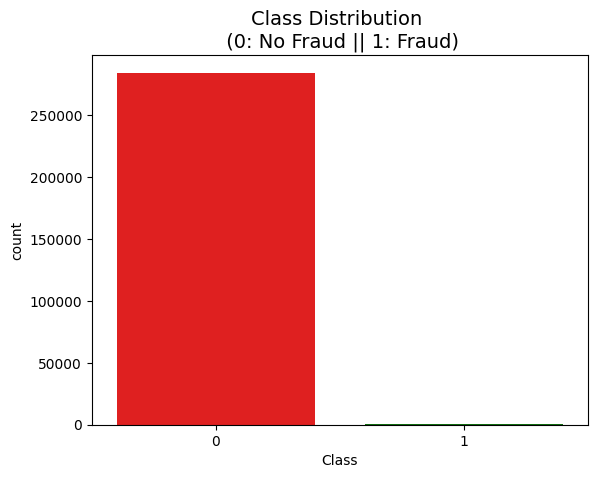

In [7]:
colors = ['red','green']

sns.countplot(x='Class',data=df,palette=colors)
plt.title("Class Distribution \n (0: No Fraud || 1: Fraud)",fontsize=14)

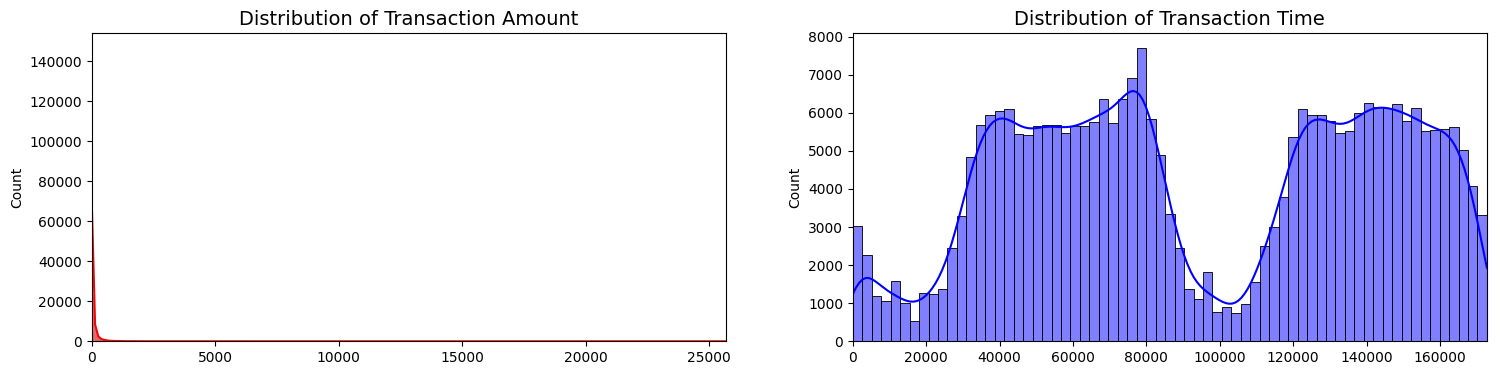

In [8]:
fig ,ax = plt.subplots(1,2,figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val,kde=True,ax=ax[0],color='r')
ax[0].set_title("Distribution of Transaction Amount",fontsize=14)
ax[0].set_xlim([min(amount_val),max(amount_val)])

sns.histplot(time_val,kde=True,ax=ax[1],color='b')
ax[1].set_title("Distribution of Transaction Time",fontsize=14)
ax[1].set_xlim([min(time_val),max(time_val)])

plt.show()


We first need to scale the Amount and Time column(rest are scaled as given in the description of the dataset)

Then we need to create a sub sample of th non fraudulent class otherwise by having imbalance dataframe we wont be able to see the true correlations between the class and features.

In [9]:
#performing scaling on Amount and Time
scaler = RobustScaler()

In [10]:
scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

df.sample(5)

,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7806,-0.211696,-0.867386,10861.0,-1.836498,0.589998,0.883304,-1.550215,-0.701004,-0.957650,-0.120757,...,0.034805,0.801190,0.078176,0.668621,-0.021844,-0.710135,-0.720957,0.059959,6.85,0
152050,-0.041920,0.141954,96775.0,2.021803,-0.296038,-1.284361,0.189496,0.264774,-0.008091,-0.252052,...,-0.051069,0.306519,0.007369,0.268901,0.205378,0.129936,-0.067867,-0.074949,19.00,0
261483,0.250821,0.885184,160038.0,-1.580057,-0.874882,2.313991,0.238628,0.710644,-1.191869,-0.598046,...,0.358727,0.771004,-0.078837,0.464249,0.497858,0.404828,0.020726,0.104305,39.95,0
85113,0.530986,-0.282910,60611.0,-0.938218,-0.843290,2.007574,-2.614192,-0.892486,0.083941,-0.731032,...,0.030585,0.263780,-0.119556,-0.374170,0.332137,-0.132881,0.283893,0.117995,60.00,0
79185,0.810452,-0.314701,57905.0,1.228315,-1.125641,0.104720,-1.876558,-1.244999,-0.702594,-0.484370,...,-0.508205,-0.866203,0.014940,0.086351,0.362476,-0.059498,0.035032,0.024914,80.00,0
